In [15]:
import numpy as np
import pandas as pd
import pdb
import os
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.manifold import TSNE, locally_linear_embedding
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
DEVELOP = True

In [3]:
train  = pd.read_csv(f'./data/train.csv.zip') 
test   = pd.read_csv(f'./data/test.csv.zip') 
labels = pd.read_csv(f'./data/test_labels.csv.zip')

In [4]:
#Combine labels and test set
test                 = test.merge(labels, how="left", on="id")
test['used_for_sc']  = test[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) >= 0 
train['used_for_sc'] = 1
test_labelled        = test[test.used_for_sc==True]
test_unlabelled      = test[test.used_for_sc!=True]

In [5]:
df = pd.concat([train, test], axis=0)

In [6]:
df['malicious'] = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) > 0

In [7]:
tokenizer = Tokenizer(num_words=40000)
tokenizer.fit_on_texts(df.comment_text.values)
train_X = tokenizer.texts_to_sequences(df.comment_text.values)
train_X = pad_sequences(train_X, maxlen=400, padding='post')

In [8]:
labels = df['malicious']

if DEVELOP:
    train_X = train_X[:1000]
    labels = labels[:1000]

In [9]:
# prepare for plotting
lle = locally_linear_embedding(train_X, n_components=2, n_neighbors=12, n_jobs=20)

In [10]:
lle = lle[0]

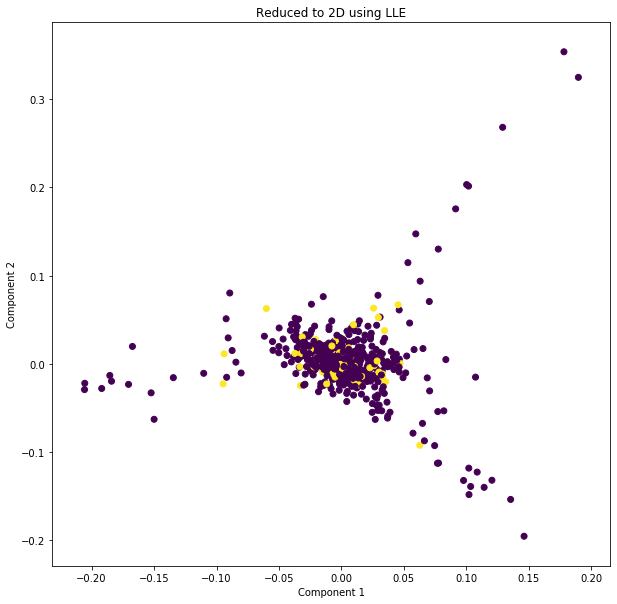

In [29]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(lle[:,0], lle[:,1], marker='o', c=labels)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Reduced to 2D using LLE')

plt.savefig('./LLE_reduce_AOBDL.png', transparent=True)

In [33]:
# prepare for plotting
pca = PCA(2)

In [34]:
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [35]:
pca = pca.transform(train_X)

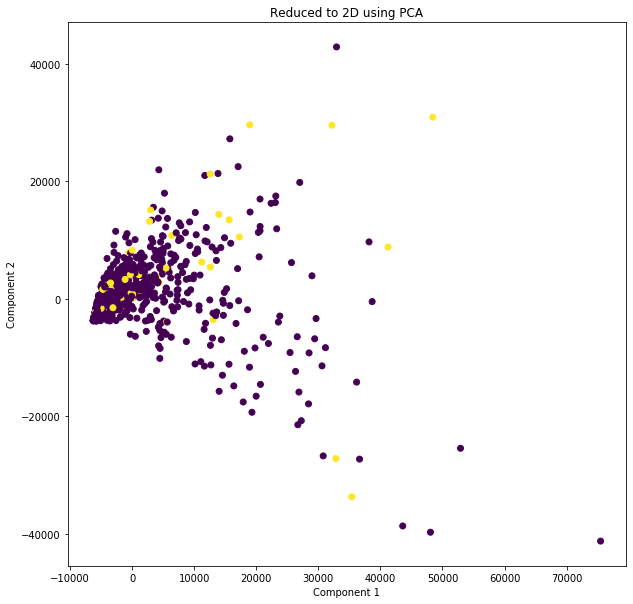

In [37]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(pca[:,0], pca[:,1], marker='o', c=labels)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Reduced to 2D using PCA')

plt.savefig('./LLE_reduce_AOBDL.png', transparent=True)